In [174]:
from yuning_util.dev_mode import DevMode
dev_mode = DevMode('k-seq')
dev_mode.on()

from importlib import reload
import pandas as pd

# Point estimation

In [107]:
from k_seq.data.seq_table import SeqTable

RES_CSV_PATH = '/mnt/storage/projects/k-seq/working/byo_doped/least_square/pod-run_10-21/bs-0_mtd-pct_res_c-40/fit_summary.csv'


byo_doped = SeqTable.load_default_dataset(dataset='byo_doped')
res_table = pd.read_csv(RES_CSV_PATH, index_col=0)

Load BYO-doped pool data from pickled record at /mnt/storage/projects/k-seq/datasets/byo_doped.pkl
Imported!


In [163]:
seq_rel_abun = byo_doped.table_filtered.loc[byo_doped.table_filtered_reacted_frac.index]['R0']
seq_rel_abun = seq_rel_abun / seq_rel_abun.values.sum()
res_table['rel_abun'] = seq_rel_abun
res_table['kA'] = res_table.k * res_table.A

## Relations of k, A, kA, or relative abundance in the initial pool

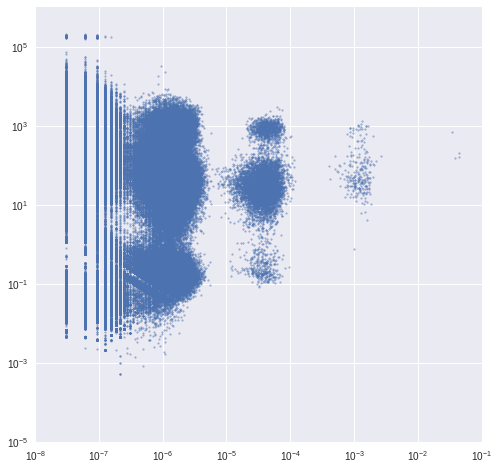

In [172]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

fig, ax = plt.subplots(1, 1, figsize=[8, 8])

ax.scatter(res_table['rel_abun'], res_table['k'], s=3, alpha=0.5)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim([1e-8, 1e-1])
ax.set_ylim([1e-5, 1e6])
plt.show()

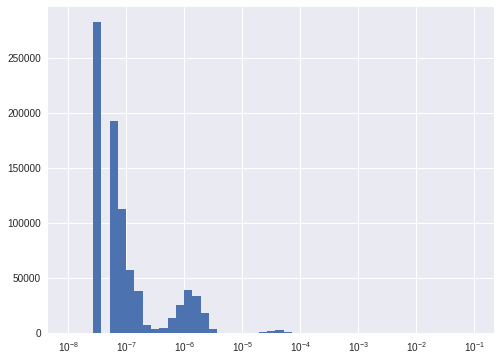

In [173]:
def dist_rel_abun(bin_num=20, bin_range=None, figsize=None):
    import matplotlib.pyplot as plt
    
    if bin_range is None:
        bin_range = [-8, -1]
    if figsize is None:
        figsize = [8, 6]
    
    fig, ax = plt.subplots(1, 1, figsize=[8, 6])
    bins = np.logspace(-8, -1, bin_num, base=10)
    ax.hist(res_table.rel_abun, bins=bins)
    ax.set_xscale('log')
    plt.show()
    
dist_rel_abun(bin_num=50)

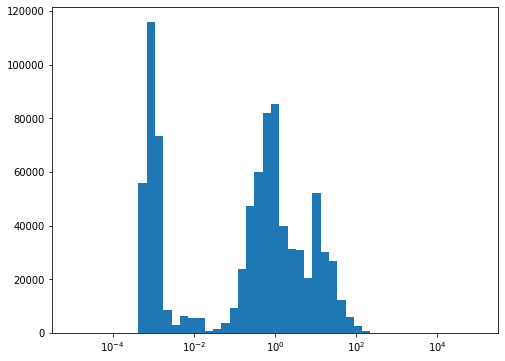

In [169]:
fig, ax = plt.subplots(1, 1, figsize=[8, 6])
bins = np.logspace(-5, 5, 50)
ax.hist(res_table.kA, bins=bins)
ax.set_xscale('log')
plt.show()

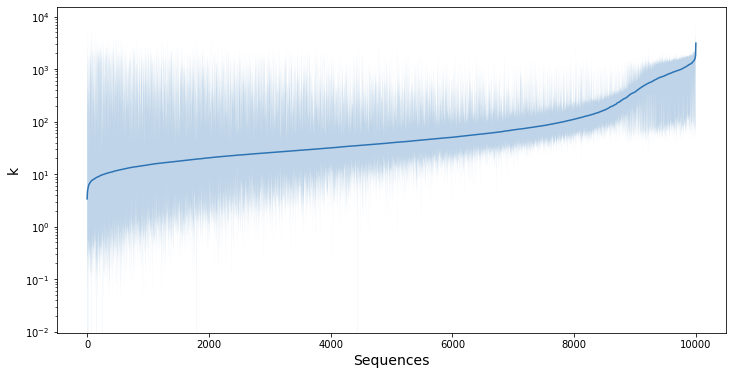

In [104]:
from k_seq.estimator import visualizer
reload(visualizer)


visualizer.param_value_plot(res_table, param='k', line_postfix='_50%', show_shade=True, sort_by='k_50%', y_log=True)

## Load reference
Here we used old results of k-seq on selected pool with Abe's script for comparison
> `/mnt/storage/projects/k-seq/datasets/byo_on_abes_method/allseqs-name-fit_repeat.csv`

As well as reported value in the paper

In [67]:
REF_PATH = '/mnt/storage/projects/k-seq/datasets/byo_on_abes_method/allseqs-name-fit_repeat.csv'
ref_table = pd.read_csv(REF_PATH, index_col='X')[2:]
ref_table

,Abun R5c-counts.txt,L by avg,k by avg,L stdev,k stdev
X,,,,,
GGGGGGAGAAGTTAATGG,0.000191,0.999411,50.765753,0.000000,0.000000
GGGGGAAATGTCAGGTCATGC,0.000191,0.337199,0.674452,0.007564,0.015246
GGGGGAAATTCCAAGGTCATG,0.000191,0.975867,14.310327,0.314230,39.507303
GGGGGAATCCTACGTGTCAAG,0.000191,0.710566,3.027453,0.294333,4.993080
GGGGGAACCGGGTGGCCCCGA,0.000191,0.337198,0.674450,0.007562,0.015242
...,...,...,...,...,...
CCCCC,0.000382,0.337199,0.674452,0.007564,0.015246
CCCC,0.000382,0.999564,55.043066,0.001454,22.233369
CCC,0.002290,0.993262,23.779244,0.009470,17.871010


In [ ]:
selected_seqs = {
    'S-2.1-a': ('ATTACCCTGGTCATCGAGTGA', 779, 0.161),
    'S-2.1-t': ('ATTACCCTGGTCATCGAGTGT', 729, 0.158),
    'S-1A.1-a': ('CTACTTCAAACAATCGGTCTG', 121, 0.283),
    'S-1B.1-a': ('CCACACTTCAAGCAATCGGTC', 46.2, 0.865),
   # 'S-1B.2-a': ('CCGCTTCAAGCAATCGGTCGC', 47.3, 0.669),
    'S-1B.3-a': ('CCGAGTTTCAAGCAATCGGTC', 71.2, 0.458),
    'S-3.1-a': ('AAGTTTGCTAATAGTCGCAAG', 142, 0.134),
   # 'S-2.2-a': ('ATTCACCTAGGTCATCGGGTG', 197, 0.132),
   # 'S-1A.1-n': ('CTCTTCAAACAATCGGTCTTC', 74.9, 0.251),
    'S-1C.1-a': ('CTCTTCAATAATCGGTTGCGT', 6.65, 1.000)
}
